<a href="https://colab.research.google.com/github/KumudiniNerella/Fake_News_Detection/blob/main/Fake_News_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import numpy as np
import pandas as pd
import seaborn as sns

In [14]:
dataset = pd.read_csv('news.csv')

In [15]:
dataset.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [16]:
dataset.shape

(6335, 4)

In [17]:
dataset.isna().sum()

Unnamed: 0    0
title         0
text          0
label         0
dtype: int64

In [18]:
dataset.dropna(axis=0,inplace=True)

In [19]:
dataset.shape

(6335, 4)

In [20]:
dataset.reset_index(inplace=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


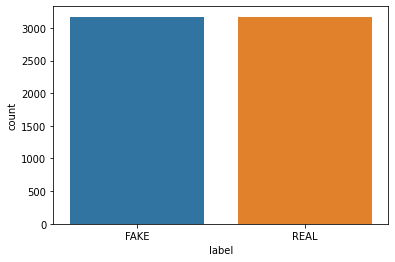

In [21]:
sns.countplot(dataset['label'])

In [38]:
data = dataset['title'][0]
data

'You Can Smell Hillary’s Fear'

In [23]:
#regular expression

import re

In [39]:
data = re.sub('[^a-zA-Z]', ' ' , data)

In [40]:
#changing to lower case

data = data.lower()
data

'you can smell hillary s fear'

In [32]:
#split the text

list=data.split()
list

['you', 'can', 'smell', 'hillary', 's', 'fear']

In [33]:
!pip install nltk
import nltk

In [34]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [35]:
#remove the stopwords from the text if any 

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [42]:
ps = PorterStemmer()

review = [ps.stem(word) for word in list if word  not in set(stopwords.words('english'))]

In [43]:
review

['smell', 'hillari', 'fear']

In [44]:
' '.join(review)

'smell hillari fear'

In [45]:
corpus = []

for i in range(0 , len(dataset)):
  review = re.sub('[^a-zA-Z]' , ' ' , dataset['title'][i])
  review = review.lower()
  list = review.split()
  review = [ps.stem(word) for word in list if not word in set(stopwords.words('english'))]
  corpus.append(' '.join(review))
   

In [46]:
corpus[0]

'smell hillari fear'

In [47]:
corpus

['smell hillari fear',
 'watch exact moment paul ryan commit polit suicid trump ralli video',
 'kerri go pari gestur sympathi',
 'berni support twitter erupt anger dnc tri warn',
 'battl new york primari matter',
 'tehran usa',
 'girl horrifi watch boyfriend left facetim',
 'britain schindler die',
 'fact check trump clinton command chief forum',
 'iran reportedli make new push uranium concess nuclear talk',
 'three clinton iowa glimps fire elud hillari clinton campaign',
 'donald trump shockingli weak deleg game somehow got even wors',
 'strong solar storm tech risk today news oct video',
 'way america prepar world war',
 'trump take cruz lightli',
 'women lead differ',
 'shock michel obama hillari caught glamor date rape promot',
 'hillari clinton huge troubl america notic sick thing hidden pictur liberti writer news',
 'iran bill obama like',
 'chart explain everyth need know partisanship america',
 'slipperi slope trump propos ban muslim',
 'episod sunday wire hail deplor special g

In [48]:
len(corpus)

6335

In [51]:
#bag of words model

from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000,ngram_range=(1,3))
X = cv.fit_transform(corpus).toarray()

In [52]:
X.shape

(6335, 5000)

In [53]:
X[0]

array([0, 0, 0, ..., 0, 0, 0])

In [54]:
y = dataset['label']

In [55]:
y.shape

(6335,)

In [56]:
## Divide the dataset into Train and Test

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [57]:
X_train.shape

(4244, 5000)

In [58]:
X_test.shape

(2091, 5000)

In [59]:
from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB()
classifier.fit(X_train, y_train)

MultinomialNB()

In [61]:
y_pred = classifier.predict(X_test)

In [62]:
y_pred

array(['REAL', 'REAL', 'FAKE', ..., 'REAL', 'FAKE', 'REAL'], dtype='<U4')

array([[800, 227],
       [153, 911]])

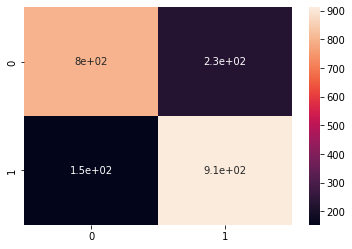

In [63]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm , annot=True)
cm

In [64]:
accuracy_score(y_test, y_pred)

0.8182687709230033